In [1]:
!pip install pandas-datareader

In [2]:
!pip install --upgrade pandas-datareader


In [62]:
import pandas as pd
import numpy as np
import datetime
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [4]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

Getting the stock data from Jan 1st 2006 to Jan 1st 2016 for the following banks:
 - Bank of America
 - CitiGroup
 - Goldman Sachs
 - JPMorgan Chase
 - Morgan Stanley
 - Wells Fargo

In [24]:
# Downloading historical stock price data for six major American banks over a specified period

# Bank of America
BAC = yf.download('BAC', start=start, end=end)

# CitiGroup
C = yf.download('C', start=start, end=end)

# Goldman Sachs
GS = yf.download('GS', start=start, end=end)

# JPMorgan Chase
JPM = yf.download('JPM', start=start, end=end)

# Morgan Stanley
MS = yf.download('MS', start=start, end=end)

# Wells Fargo
WFC = yf.download('WFC', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [25]:
BAC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002,31.943674,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,31.604435,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,31.645130,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,31.597639,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,31.617996,15619400
...,...,...,...,...,...,...
2015-12-24,17.320000,17.379999,17.219999,17.270000,14.451777,29369400
2015-12-28,17.219999,17.230000,16.980000,17.129999,14.334627,41777500
2015-12-29,17.250000,17.350000,17.160000,17.280001,14.460145,45670400


Creating a list of ticker symbols (as strings) in alphabetical order

In [26]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WF']

Concatenating the bank dataframes together to a single data frame

In [27]:
 bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)

In [28]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info',]

In [29]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  31.943674  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.604435  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.645130  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.597639  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.617996  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                        WF                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.259636  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.282475  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.373730  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.407951  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.761585  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.234493  11016400  
2006-01-04   31.530001  19.011396  10870000  
2006-01-05   31.495001  18.990292  10158000  
2006-01-06   31.680000  19.101845   8403800  
2006-01-09   31.674999  19.098820   5619600  

[5 rows x 36 columns]

Max Close price for each bank's stock throughout the time period

In [30]:
for tick in tickers:
  print(tick, bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WF 58.52000045776367


In [31]:
# Another Way
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WF      58.520000
dtype: float64

New empty DataFrame called returns

In [32]:
returns = pd.DataFrame()

Creating a for loop that goes and for each Bank Stock Ticker creates this returns column and sets it as a column in the returns DataFrame

In [33]:
for tick in tickers:
  returns[tick+ ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Pairplot of the returns dataframe

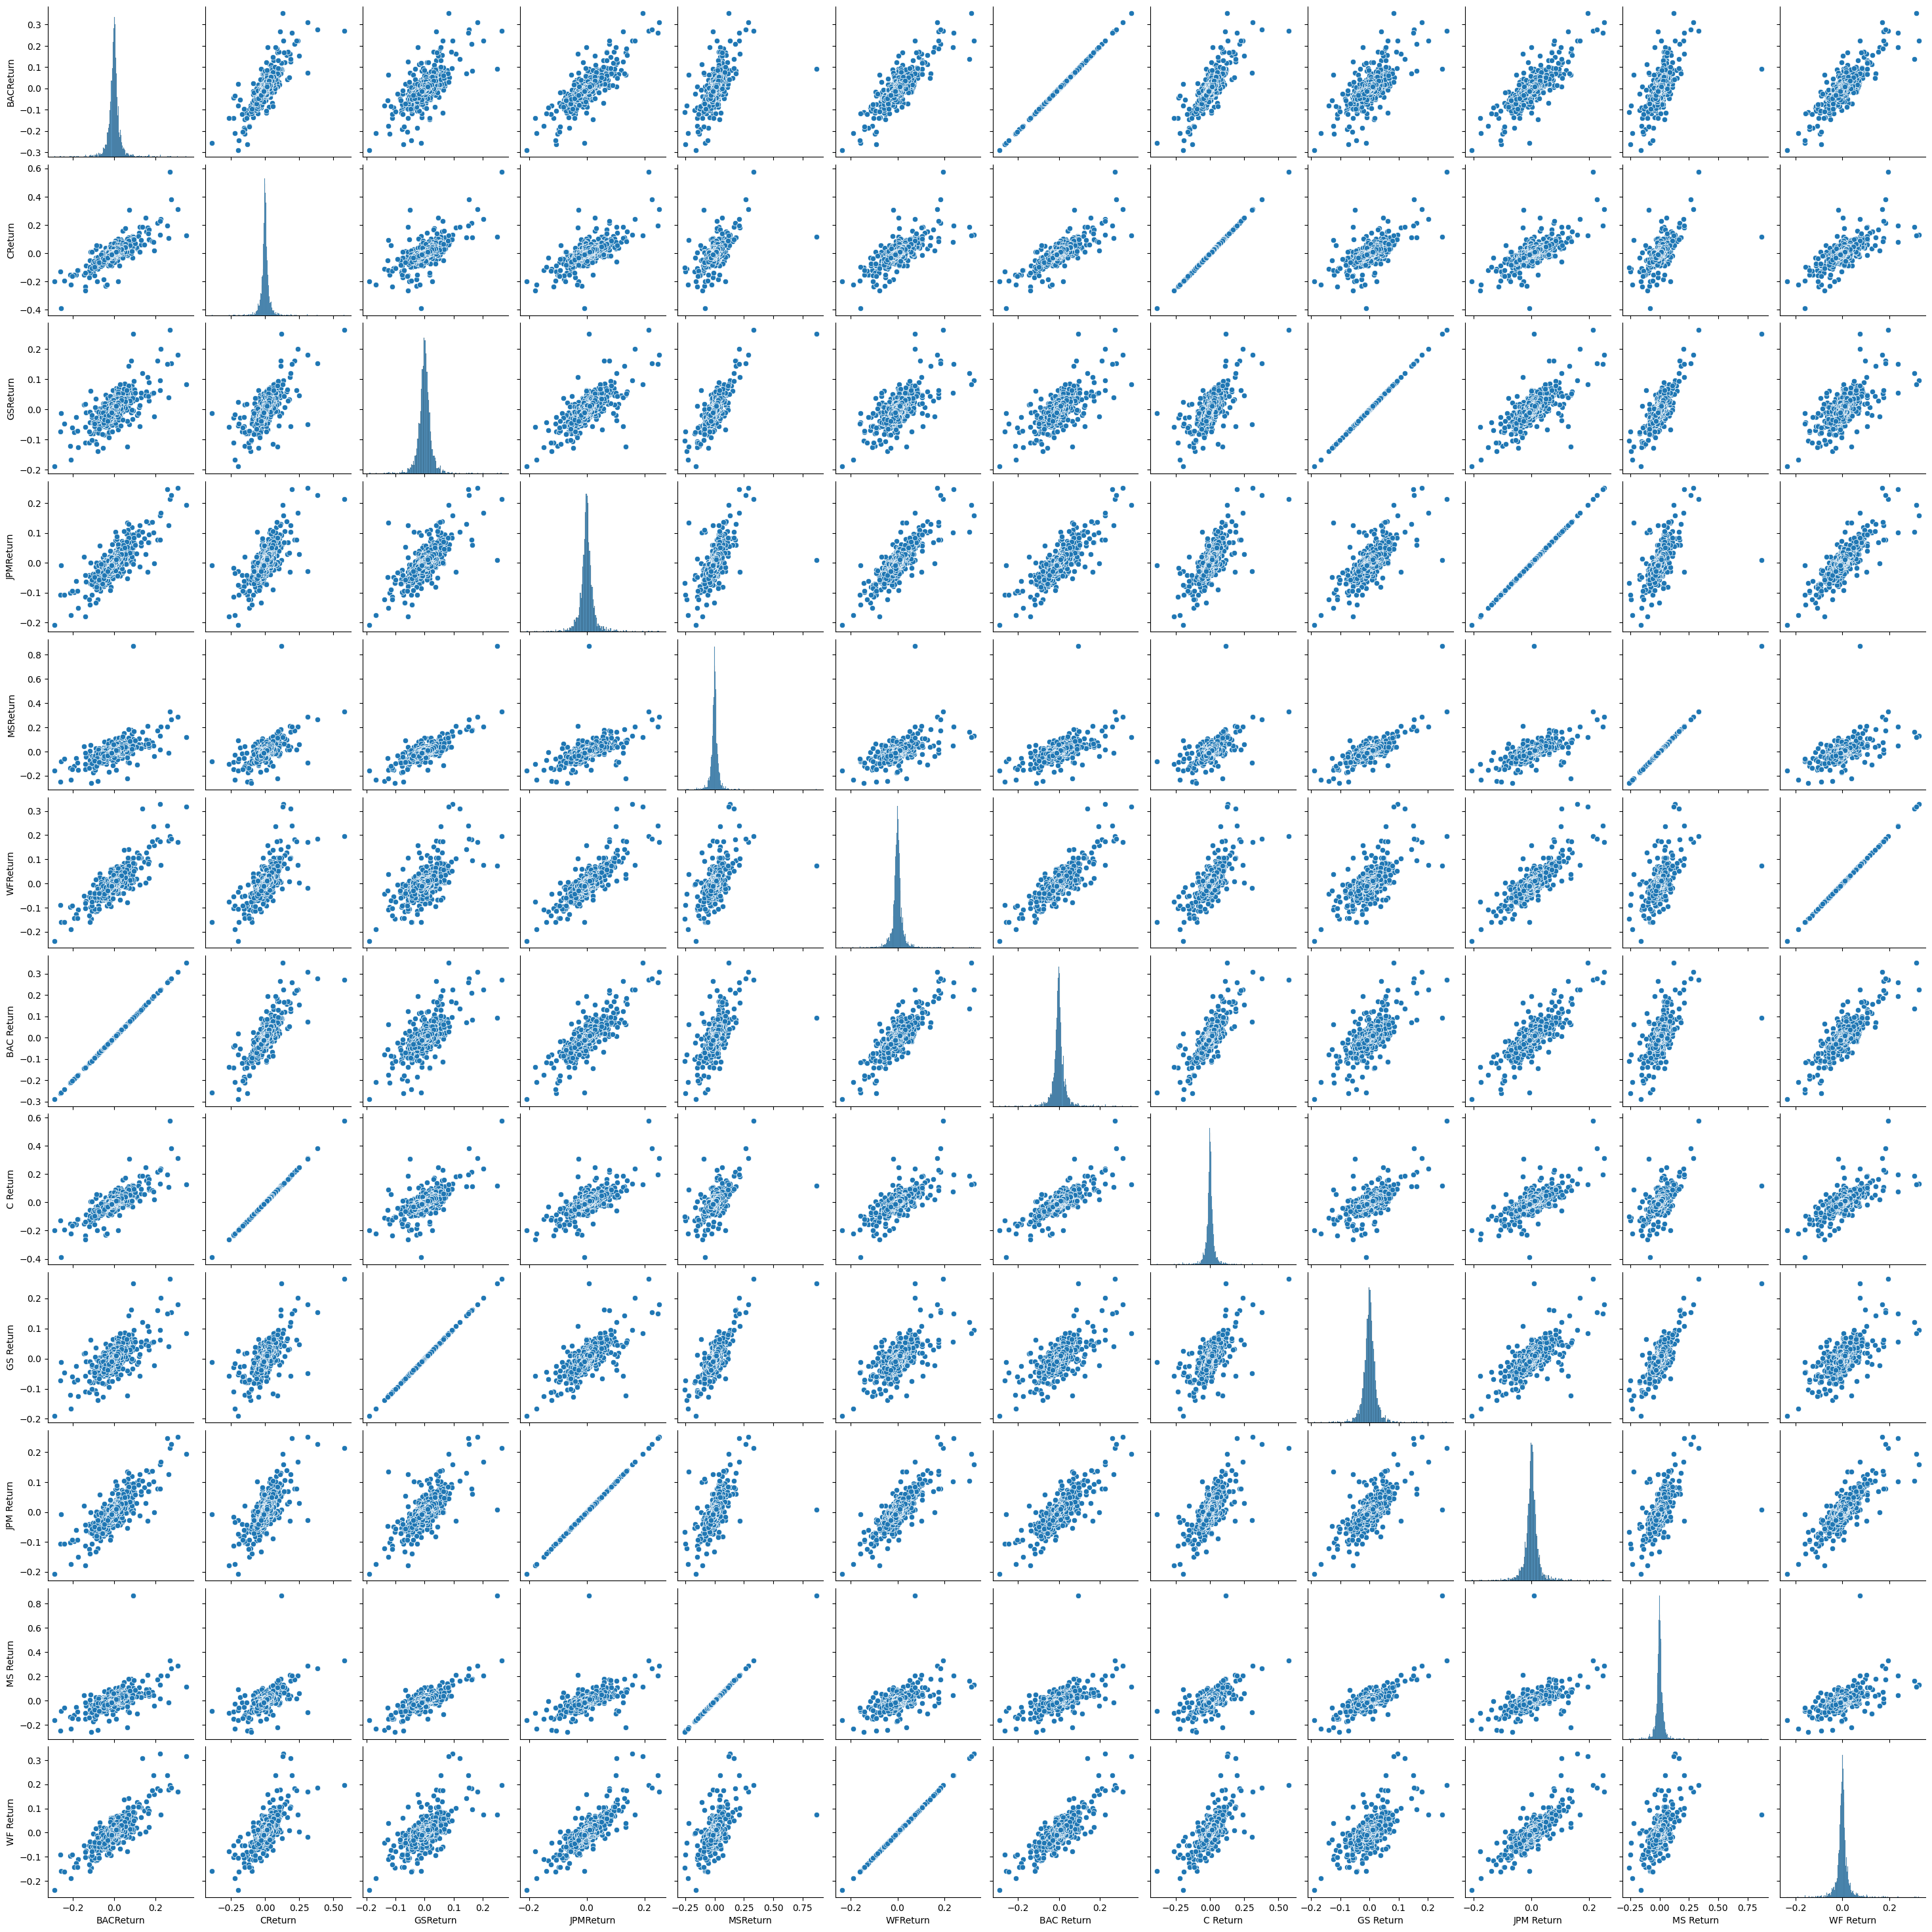

In [19]:
sns.pairplot(returns[1:])

Dates each bank stock had the best and worst single daay returns

In [34]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [35]:
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WF Return    -0.238223
dtype: float64

In [79]:
returns.idxmin() # dates of the minimum values for the returns for each bank

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WF Return    2009-01-20
dtype: datetime64[ns]

In [39]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WF Return    2008-07-16
dtype: datetime64[ns]

Standard deviation of the returns

In [41]:
returns.std() # the riskiest one is C

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WF Return     0.030238
dtype: float64

Distplot of the 2015 returns for Morgan Stanley

<ipython-input-68-08cf878567f5>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='MS Return', ylabel='Density'>

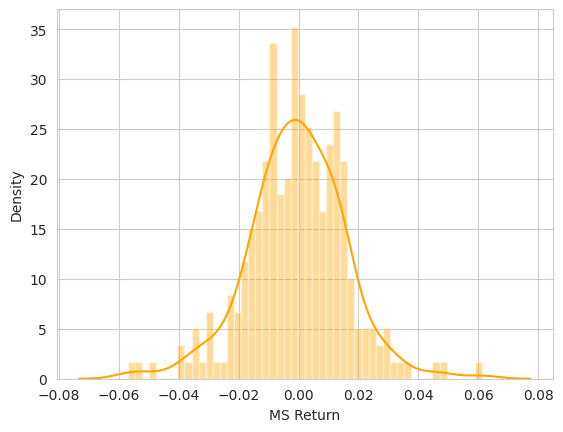

In [68]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color = 'orange', bins = 50)

Distplot of the 2008 returns for CitiGroup

<ipython-input-67-68ed09508001>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='C Return', ylabel='Density'>

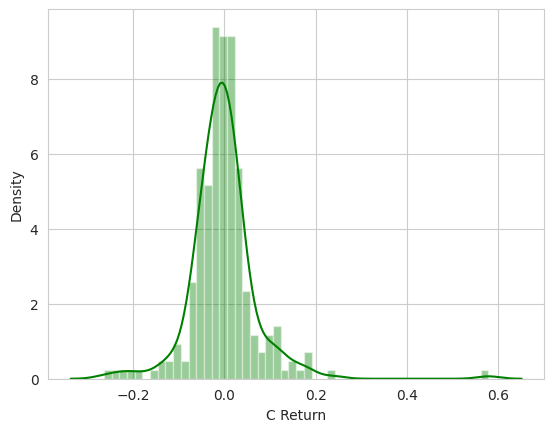

In [67]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color = 'green', bins = 50)

Line plot showing Close price for each bank for the entire index of time

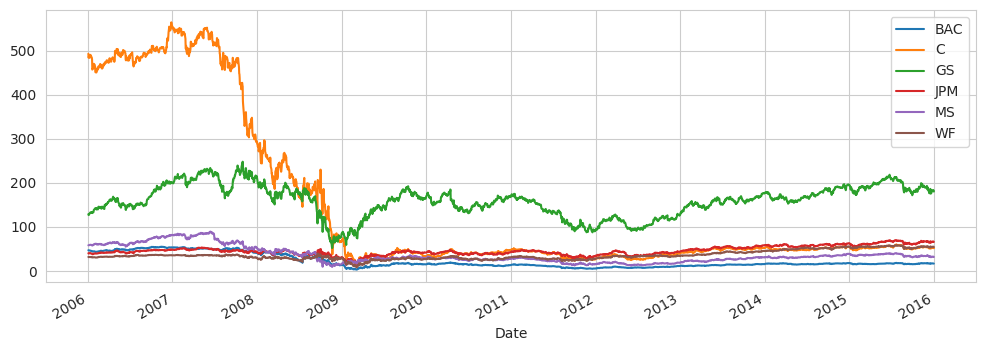

In [54]:
for tick in tickers:
  bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<Axes: xlabel='Date'>

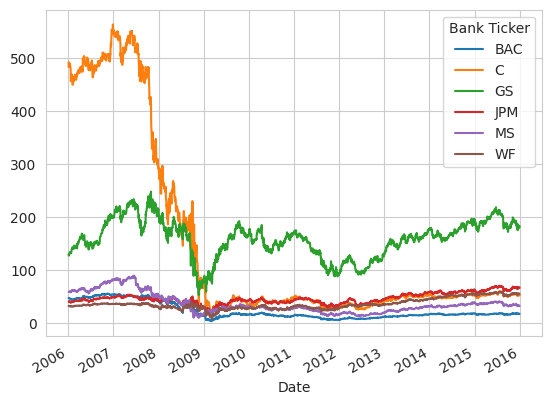

In [57]:
# Another way
bank_stocks.xs(key='Close', axis=1,level='Stock Info').plot()

Plot of of the rolling 30 day average against the Close price for Bank of America's stock for the year 2008

In [64]:
BAC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002,31.943674,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,31.604435,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,31.645130,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,31.597639,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,31.617996,15619400


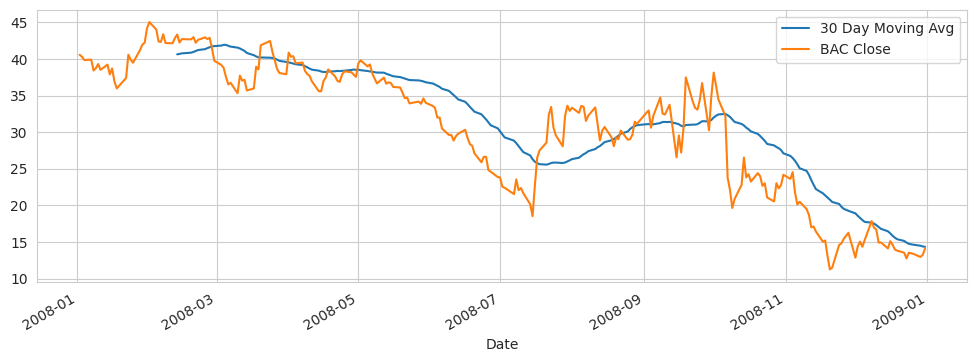

In [66]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Moving Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()


Heatmap of the correlation between the stocks Close Price

In [71]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WF
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WF,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

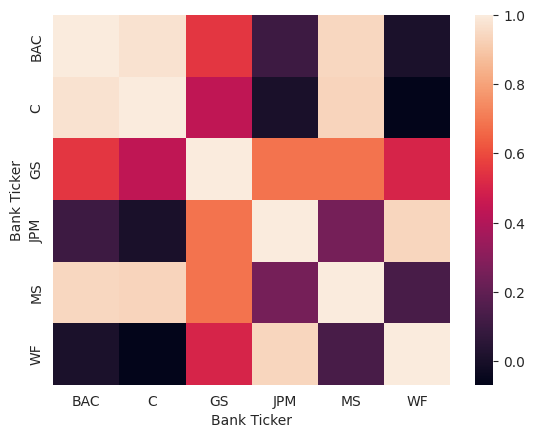

In [72]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr())

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

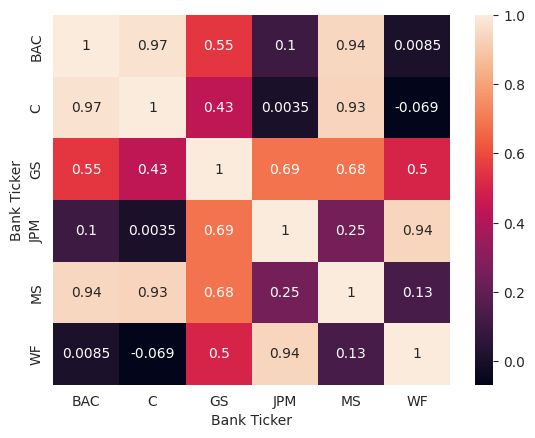

In [73]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

Clustering the correlations together

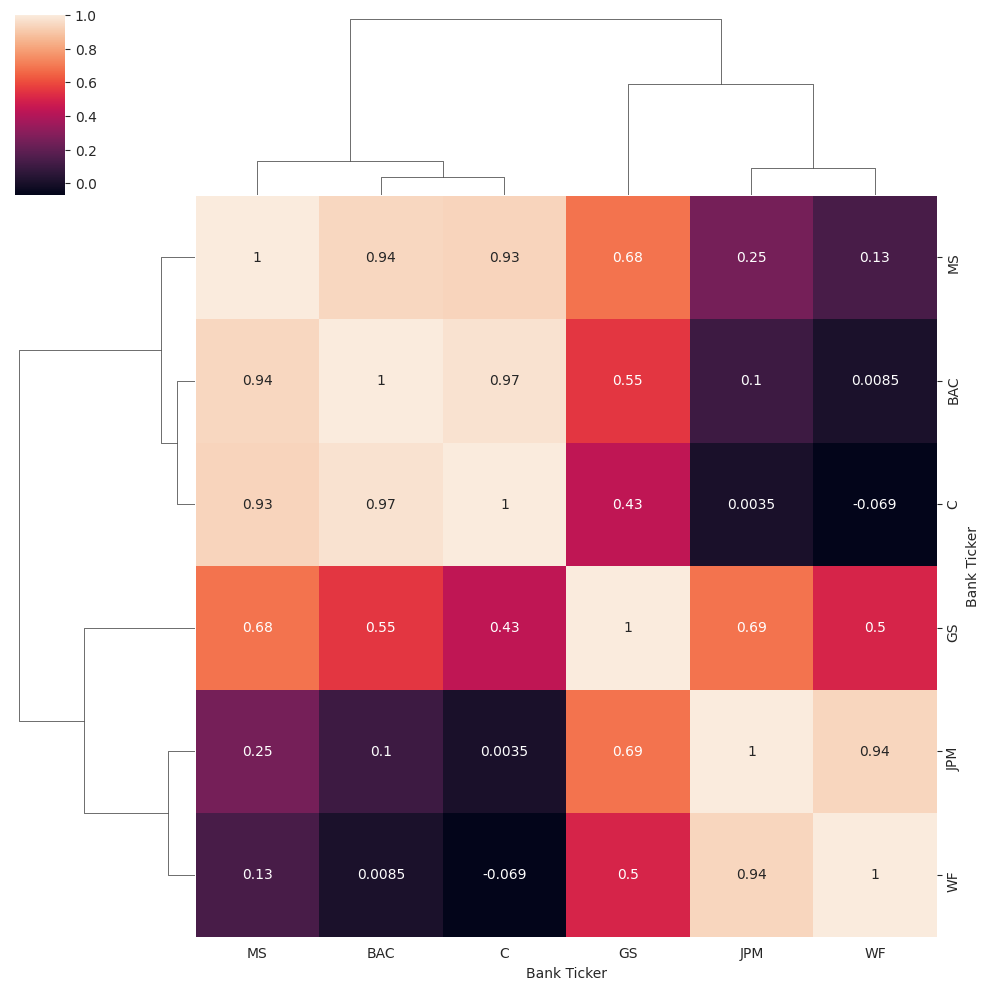

In [78]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)